In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm.notebook import tqdm
from TestRunner import Stress

logged = [10, 20, 50, 100, 250, 500]
total = np.array(logged) * 2

datasets = [100, 500]

iterations = 25

downloads = [1, 5]

results = {'SQL' : [], 'SQL+REDIS':[]}

parameters_tuples = []

for i in range(len(logged)):
    for dataset_cnt in datasets:
        for d_cnt in downloads:
            parameters_tuples.append([total[i], logged[i], dataset_cnt, iterations, d_cnt])

print (np.array(parameters_tuples))

[[  20   10  100   25    1]
 [  20   10  100   25    5]
 [  20   10  500   25    1]
 [  20   10  500   25    5]
 [  40   20  100   25    1]
 [  40   20  100   25    5]
 [  40   20  500   25    1]
 [  40   20  500   25    5]
 [ 100   50  100   25    1]
 [ 100   50  100   25    5]
 [ 100   50  500   25    1]
 [ 100   50  500   25    5]
 [ 200  100  100   25    1]
 [ 200  100  100   25    5]
 [ 200  100  500   25    1]
 [ 200  100  500   25    5]
 [ 500  250  100   25    1]
 [ 500  250  100   25    5]
 [ 500  250  500   25    1]
 [ 500  250  500   25    5]
 [1000  500  100   25    1]
 [1000  500  100   25    5]
 [1000  500  500   25    1]
 [1000  500  500   25    5]]


In [3]:
for params in tqdm(parameters_tuples):
    results['SQL'].append(Stress.initRunTesting(False, *params))
    results['SQL+REDIS'].append(Stress.initRunTesting(True, *params))

  0%|          | 0/24 [00:00<?, ?it/s]

In [7]:
results_np = pd.DataFrame(results).to_numpy()

In [13]:
states = np.array([results_np[::4], results_np[1::4],results_np[2::4],results_np[3::4]])

In [15]:
states[:,:,0]

array([[  0.24103785,   0.4117589 ,   1.18614507,   3.22586703,
         13.07866096,  42.80538607],
       [  0.46311092,   0.86507297,   3.07980323,   9.27719498,
         47.648808  , 176.13471699],
       [  0.18680286,   0.51627398,   1.19292903,   3.22632337,
         12.91934991,  42.84538007],
       [  0.38646865,   0.88961315,   3.37241602,   9.52865696,
         47.18973994, 172.91668105]])

Text(0.5, 1.0, 'Downloads per iteration = 1')

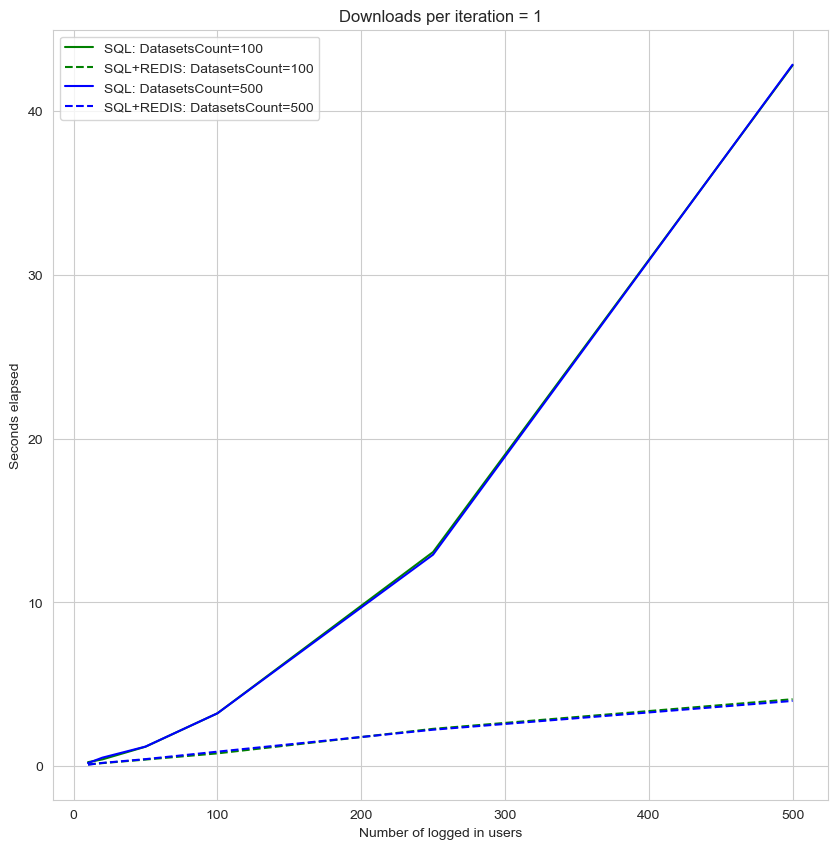

In [36]:
labels = [f'DatasetsCount={x[2]}' for x in parameters_tuples]

plt.rcParams['figure.figsize'] = (10, 10)
sns.set_style('whitegrid')
colors = ['green', 'magenta', 'blue', 'black']
for i in [0, 2]:
    sns.lineplot(x=logged, y=states[i, :, 0], label=f'SQL: {labels[i]}', color = colors[i])
    sns.lineplot(x=logged, y=states[i, :, 1], linestyle = '--', label=f'SQL+REDIS: {labels[i]}', color = colors[i])
plt.xlabel('Number of logged in users')
plt.ylabel('Seconds elapsed')
plt.title('Downloads per iteration = 1')


Text(0.5, 1.0, 'Downloads per iteration = 5')

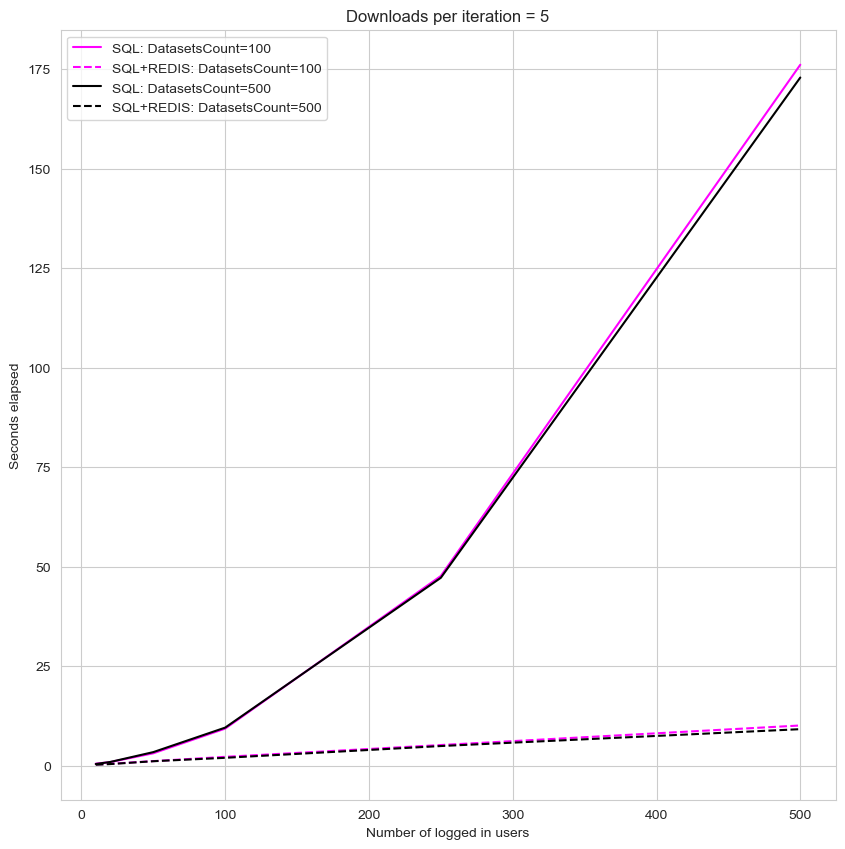

In [37]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.set_style('whitegrid')
colors = ['green', 'magenta', 'blue', 'black']
for i in [1, 3]:
    sns.lineplot(x=logged, y=states[i, :, 0], label=f'SQL: {labels[i]}', color = colors[i])
    sns.lineplot(x=logged, y=states[i, :, 1], linestyle = '--', label=f'SQL+REDIS: {labels[i]}', color = colors[i])
plt.xlabel('Number of logged in users')
plt.ylabel('Seconds elapsed')
plt.title('Downloads per iteration = 5')


In [50]:
len(results['SQL'])

24

In [51]:
table = np.zeros((4, 12))
for i in range(4):
    for j in range(6):
        for k in range(2):
            table[i, j * 2 + k] = states[i,j,k]

In [56]:
table = pd.DataFrame(table)
table.columns = sum(([str(x) + '(SQL)', str(x) + '(SQL+)'] for x in logged), [])
table.index = ['100D1R', '100D5R', '500D1R', '500D5R']
table


,10(SQL),10(SQL+),20(SQL),20(SQL+),50(SQL),50(SQL+),100(SQL),100(SQL+),250(SQL),250(SQL+),500(SQL),500(SQL+)
100D1R,0.241038,0.106109,0.411759,0.183149,1.186145,0.401592,3.225867,0.778823,13.078661,2.276618,42.805386,4.087094
100D5R,0.463111,0.271552,0.865073,0.439426,3.079803,1.110753,9.277195,2.190448,47.648808,5.154669,176.134717,10.068613
500D1R,0.186803,0.085333,0.516274,0.195917,1.192929,0.426709,3.226323,0.882650,12.919350,2.223650,42.845380,3.983056
500D5R,0.386469,0.205240,0.889613,0.367480,3.372416,1.083434,9.528657,1.942385,47.189740,4.900755,172.916681,9.141543
